In [269]:
# AUTHOR Christian Dansereau 2016

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

import pandas as pd
import scipy.io
import os
import nibabel as nib
from nibabel.affines import apply_affine
from nilearn import plotting
import numpy.linalg as npl

# Load data

In [270]:
#seed_data = pd.read_csv('20160128_AD_Decrease_Meta_Christian.csv')

template_036= nib.load('/home/cdansereau/data/template_cambridge_basc_multiscale_nii_sym/template_cambridge_basc_multiscale_sym_scale036.nii.gz')
template_020= nib.load('/home/cdansereau/data/template_cambridge_basc_multiscale_nii_sym/template_cambridge_basc_multiscale_sym_scale020.nii.gz')
template_012= nib.load('/home/cdansereau/data/template_cambridge_basc_multiscale_nii_sym/template_cambridge_basc_multiscale_sym_scale012.nii.gz')
template_007= nib.load('/home/cdansereau/data/template_cambridge_basc_multiscale_nii_sym/template_cambridge_basc_multiscale_sym_scale007.nii.gz')

template = template_007

scale = '7'

seed_data = pd.read_csv('20160205_AD_Decrease_Meta_Final.csv')
#seed_data = pd.read_csv('20160129_AD_Increase_Meta_Final.csv')

#seed_data = pd.read_csv('20160205_MCI_Decrease_Meta_Final.csv')
#seed_data = pd.read_csv('20160204_MCI_Increase_Meta_Final.csv')


output_stats = 'AD_decrease_scale'+scale+'_stats.mat'
output_vol   = 'AD_decrease_hitfreq_scale'+scale+'_vol.nii.gz'
#output_stats = 'AD_increase_scale'+scale+'_stats.mat'
#output_vol   = 'AD_increase_hitfreq_scale'+scale+'_vol.nii.gz'

#output_stats = 'MCI_decrease_scale'+scale+'_stats.mat'
#output_vol   = 'MCI_decrease_hitfreq_scale'+scale+'_vol.nii.gz'
#output_stats = 'MCI_increase_scale'+scale+'_stats.mat'
#output_vol   = 'MCI_increase_hitfreq_scale'+scale+'_vol.nii.gz'

In [271]:
seed_data

,PMID,Author,Year,subjects,x,y,z,Contrast,Direction
0,17133390,Wang,2007,28,-6,-55,5,AD,Decrease
1,17133390,Wang,2007,28,-6,-57,28,AD,Decrease
2,17133390,Wang,2007,28,-6,-57,19,AD,Decrease
3,17133390,Wang,2007,28,3,-62,50,AD,Decrease
4,17133390,Wang,2007,28,15,-55,14,AD,Decrease
5,17133390,Wang,2007,28,9,-63,22,AD,Decrease
6,17133390,Wang,2007,28,50,-48,22,AD,Decrease
7,17133390,Wang,2007,28,-27,20,57,AD,Decrease
8,17133390,Wang,2007,28,-30,29,31,AD,Decrease
9,18786570,Zhang,2009,32,6,55,47,AD,Decrease


## Get the number of coordinates reported for each network

In [272]:
from numpy.linalg import norm
# find the closest network to the coordo
def get_nearest_net(template,world_coor):
    list_coord = np.array(np.where(template.get_data()>0))
    mni_coord = apply_affine(template.get_affine(),list_coord.T)
    distances = norm(mni_coord-np.array(world_coor),axis=1)
    #print distances.shape
    idx_nearest_net = np.where(distances == np.min(distances))[0][0]
    return int(template.get_data()[list_coord[:,idx_nearest_net][0],list_coord[:,idx_nearest_net][1],list_coord[:,idx_nearest_net][2]])
    
#get_nearest_net(template,[-15,-10,-10])
# Convert from world MNI space to the EPI voxel space
def get_world2vox(template, mni_coord):
    return np.round(apply_affine(npl.inv(template.get_affine()),mni_coord)+[1])
    
network_votes = np.zeros((np.max(template.get_data().flatten()),1))[:,0]
network_votes

# get the voxel coordinates of the MNI seeds
mni_space_targets = seed_data[['x','y','z']].values
vox_corrd = get_world2vox(template,mni_space_targets)
votes = []
n_outofbrain=0
for i in range(vox_corrd.shape[0]):
    net_class = template.get_data()[vox_corrd[i,0],vox_corrd[i,1],vox_corrd[i,2]]
    if net_class==0:
        n_outofbrain+=1
        votes.append(get_nearest_net(template,[mni_space_targets[i,0],mni_space_targets[i,1],mni_space_targets[i,2]]))
    else:
        votes.append(net_class)

print('Out of brain coordinates: '+ str(n_outofbrain))
votes = np.array(votes)    

# take one vote for each study only
uni_pmid = np.unique(seed_data['PMID'])
votes.shape
frequency_votes=np.zeros((len(uni_pmid),len(network_votes)))
#for i in range(len(uni_pmid)):
#    frequency_votes = np.hstack((frequency_votes,np.unique(votes[(seed_data['PMID']==uni_pmid[i]).values])))
for i in range(len(uni_pmid)):
    aa = votes[(seed_data['PMID']==uni_pmid[i]).values]
    for j in aa:
        frequency_votes[i,j-1] = (aa == j).sum()/float(len(aa))
print frequency_votes


# compile the stats for each network
#for i in range(1,len(network_votes)+1):
#    network_votes[i-1] = np.mean(frequency_votes==i)
network_votes = np.mean(frequency_votes,axis=0)
print network_votes 
#vox_corrd[np.array(votes)==5,:]

Out of brain coordinates: 29
[[ 0.          0.          0.          0.          0.77777778  0.22222222
   0.        ]
 [ 0.          0.2         0.2         0.2         0.2         0.05        0.15      ]
 [ 0.          0.16666667  0.          0.          0.          0.5
   0.33333333]
 [ 0.05882353  0.17647059  0.          0.05882353  0.29411765  0.11764706
   0.29411765]
 [ 0.          0.44444444  0.          0.11111111  0.44444444  0.          0.        ]
 [ 0.          0.          0.15789474  0.26315789  0.26315789  0.31578947
   0.        ]
 [ 0.          0.18181818  0.          0.          0.45454545  0.27272727
   0.09090909]
 [ 0.          0.          0.          0.          1.          0.          0.        ]
 [ 0.25        0.          0.          0.25        0.25        0.          0.25      ]
 [ 0.          0.11111111  0.          0.          0.44444444  0.33333333
   0.11111111]
 [ 0.          0.          0.          0.          0.5         0.5         0.        ]
 [ 0.    

In [273]:
def gen1perm(n_seeds,proba):
    ratio_votes_1study = np.zeros_like(proba)
    perm_votes = np.random.choice(range(0,len(proba)),size=(n_seeds,1),p=proba)
    for j in perm_votes:
        ratio_votes_1study[j] = (perm_votes == j).sum()/float(len(perm_votes))
    return ratio_votes_1study

# check if the proba is respected 
#print proba_networks
#gen1perm(10000,proba_networks)
#ange(0,len(proba_networks))

## Generate random coordinates
#### The assigned coodinates are generated for each network witha proability equivalent to there volume size compare to the total volume of the brain

In [274]:
'''
from numpy.random import permutation
def permute_table(frequency_votes,n_iter):
    h0_results = []
    for n in range(n_iter):
        perm_freq = frequency_votes.copy()
        #print perm_freq
        for i in range(perm_freq.shape[0]):
            perm_freq[i,:] = permutation(perm_freq[i,:])
        #print perm_freq
        h0_results.append(np.mean(perm_freq,axis=0))
    return np.array(h0_results).T
'''
def compute_freq(votes,data_ratio_votes,seed_data,proba):
    # take one vote for each study only
    uni_pmid = np.unique(seed_data['PMID'])
    ratio_votes=np.zeros((data_ratio_votes.shape[0],data_ratio_votes.shape[1],10000))
    for idx_perm in range(ratio_votes.shape[-1]):
        #    frequency_votes = np.hstack((frequency_votes,np.unique(votes[(seed_data['PMID']==uni_pmid[i]).values])))
        for i in range(len(uni_pmid)):
            aa = votes[(seed_data['PMID']==uni_pmid[i]).values]
            n_seeds = len(aa)
            ratio_votes[i,:,idx_perm] = gen1perm(n_seeds,proba)
        #print ratio_votes.shape
    # compute the frequency
    freq_data = np.mean(ratio_votes,axis=0)
        
    for i in range(freq_data.shape[0]):
        freq_data[i,:] = np.sort(freq_data[i,:])[::-1]
        
    return freq_data

# Total volume of the brain
total_volume = np.sum(template.get_data()>0)

# compute the proba of each network
proba_networks=[]
for i in range(1,len(network_votes)+1):
    proba_networks.append(np.sum(template.get_data()==i)/(total_volume*1.))
proba_networks = np.array(proba_networks)
print np.sum(proba_networks)
print proba_networks

# generate random values 
'''
def gen_rnd_hits(proba,n_seeds):
    results_h0 =  np.random.choice(range(0,len(proba)),size=(n_seeds,1000),p=proba)
    #results_h0 = permute_table(frequency_votes,1000)
    print results_h0.shape
    ditributions = []
    for i in range(frequency_votes.shape[1]):
        results_h0[i,:] = np.sort(results_h0[i,:])[::-1]
        #ditributions.append(one_way_pdf)   
    #return ditributions
    return results_h0
'''
#dist_data = gen_rnd_hits(proba_networks,np.sum(network_votes))
dist_data = compute_freq(votes,frequency_votes,seed_data,proba_networks)

1.0
[ 0.12507354  0.0961412   0.08271327  0.11642153  0.15549403  0.21121301
  0.21294342]


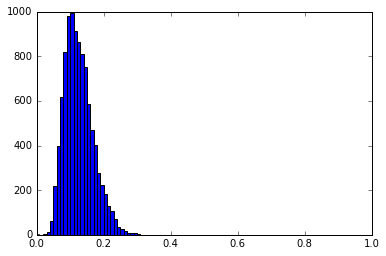

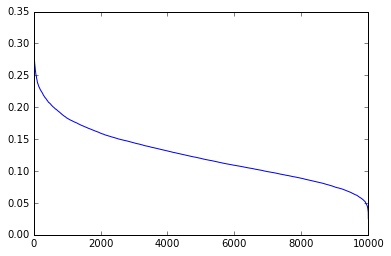

In [275]:
plt.figure()
plt.hist(dist_data[0],bins=np.arange(0,1,.01))
plt.figure()
plt.plot(dist_data[0].T)

## Generate the p-values for each network

[ 0.01715686  0.08375904  0.0222985   0.09460935  0.38942155  0.26108191
  0.13167278]
[1.0, 0.5564443555644436, 0.99580041995800417, 0.65623437656234374, 0.00019998000199980003, 0.17118288171182883, 0.95630436956304365]


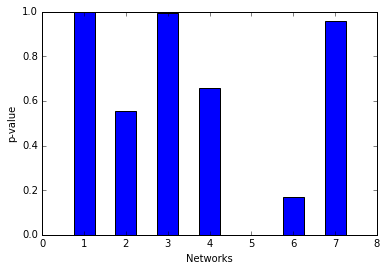

In [276]:
def getpval_old(nhit,dist_data):
    distribution_val =  np.histogram(dist_data,bins=np.arange(0,1,0.01))
    idx_bin = np.where((distribution_val[1]>=round(nhit,2)) & (distribution_val[1]<=round(nhit,2)))[0][0]
    #print distribution_val[1]
    return (np.sum(distribution_val[0][idx_bin:-1])+1)/(dist_data.shape[0]+1.)

def getpval(target,dist_data):
    dist_sorted = np.sort(np.copy(dist_data))
    b = np.sum(dist_sorted > target)
    #print b
    #print dist_data.shape[0]
    #print distribution_val[1]
    return ((b+1.)/(dist_data.shape[0]+1.))

print network_votes

pval_results=[]
for i in range(0,len(dist_data)):
    pval_results.append(getpval(network_votes[i],dist_data[i,:]))
    
print pval_results
plt.figure()
plt.bar(np.arange(1,len(pval_results)+1),pval_results,width=0.5,align='center')
plt.xlabel('Networks')
plt.ylabel('p-value')

### Map the p-values to the template

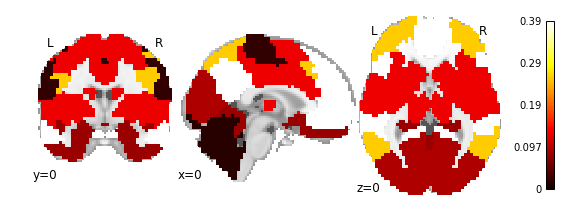

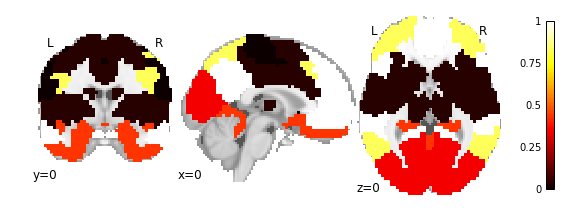

In [277]:
from proteus.matrix import tseries as ts
hitfreq_vol = ts.vec2map(network_votes,template)
pval_vol = ts.vec2map(1-np.array(pval_results),template)
plt.figure()
plotting.plot_stat_map(hitfreq_vol,cut_coords=(0,0,0),draw_cross=False)
plt.figure()
plotting.plot_stat_map(pval_vol,cut_coords=(0,0,0),draw_cross=False)


#### FDR correction of the p-values

In [278]:
# correct for FRD
from statsmodels.sandbox.stats.multicomp import fdrcorrection0

fdr_test,fdr_pval=fdrcorrection0(pval_results,alpha=0.05)
print network_votes
print fdr_test
print fdr_pval

[ 0.01715686  0.08375904  0.0222985   0.09460935  0.38942155  0.26108191
  0.13167278]
[False False False False  True False False]
[ 1.          1.          1.          1.          0.00139986  0.59914009
  1.        ]


In [279]:
# save the results

path_output = '/home/cdansereau/git/Projects/metaad/maps_results/'
stats_results = {'Hits':network_votes ,'pvalues':pval_results,'fdr_test':fdr_test,'fdr_pval':fdr_pval,'n_outofbrain':n_outofbrain}
scipy.io.savemat(path_output + output_stats, stats_results)
hitfreq_vol.to_filename(os.path.join(path_output,output_vol))
#hitfreq_vol.to_filename(os.path.join('/home/cdansereau/git/Projects/metaad/maps_results/','AD_pval_vol.nii.gz'))

In [280]:
a = np.array([5,0,3,3,3,6])
b = np.array([5,2,3,5,5,6])

c= (a==b)
#a[np.array([1,1,0,0,1,0])==1]
c = [np.array([1, 1, 1, 1, 1, 1, 1, 0, 0]), np.array([1, 1, 0, 1, 1, 0, 1, 1, 1, 1])]
c = [np.array([1, 1]), np.array([1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0])]
c=[np.array([1, 1, 1, 1, 1, 1]), np.array([0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0])]
c=[np.array([1, 1, 0, 0, 1, 1]), np.array([1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0])]
c=[np.array([1, 1, 1, 1, 0, 1, 1, 0]), np.array([1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0])]

np.mean(c[0]),np.mean(c[1])


(0.75, 0.81818181818181823)

(200, 2)
('Number of estimated cluster', 2)


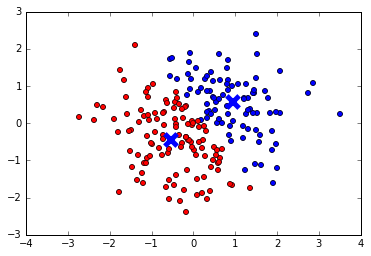

In [281]:
from sklearn.cluster import MeanShift,KMeans
from sklearn.datasets.samples_generator import make_blobs


centers = [[0,0], [0,0]]
X,y = make_blobs(n_samples = 200, centers=centers, cluster_std=1)

print X.shape
plt.scatter(X[:,0],X[:,1])

ms = MeanShift()
ms = KMeans(2)
ms.fit(X)
labels = ms.labels_
cluster_centers = ms.cluster_centers_

n_clusters_ = len(np.unique(labels))

print("Number of estimated cluster", n_clusters_)

colors = 10*['ro','bo','co','go','ko','yo','mo']

for i in range(len(X)):
    plt.plot(X[i][0], X[i][1], colors[labels[i]], markersize=5)
    
plt.scatter(cluster_centers[:,0],cluster_centers[:,1],
           marker='x', s=150, linewidths = 5, zorder=10)

In [282]:
10**0.35

2.2387211385683394